In [92]:
import pandas as pd
import numpy as np
import random
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
from scipy import stats


In [43]:
genotype = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/genotype.csv', sep='\t', index_col=0)
emp_pvals = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')


In [44]:
genotype

,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,...,Sample490,Sample491,Sample492,Sample493,Sample494,Sample495,Sample496,Sample497,Sample498,Sample499
SNP0,1,2,1,1,2,1,1,0,0,0,...,1,1,1,2,1,2,1,1,1,0
SNP1,0,1,0,0,1,0,1,0,1,1,...,2,1,1,0,1,2,1,2,1,1
SNP2,0,2,2,1,0,0,0,1,0,1,...,2,0,1,1,2,0,1,2,0,2
SNP3,2,2,2,0,1,2,1,0,1,0,...,2,0,1,0,2,1,1,1,0,1
SNP4,2,1,1,1,2,2,1,1,1,2,...,0,2,1,2,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNP995,1,1,1,0,1,0,2,0,2,0,...,1,0,0,1,1,1,1,1,1,1
SNP996,0,1,1,0,0,0,0,1,0,1,...,1,2,2,1,1,0,0,2,1,1
SNP997,2,2,2,1,2,1,1,1,1,1,...,0,1,1,0,1,1,1,1,0,0
SNP998,1,1,1,2,1,2,0,0,2,1,...,1,0,2,1,0,1,1,0,2,2


In [48]:
snp0_geno = np.array(genotype.loc['SNP0'])

In [70]:
def permute_snps(snp, n, genotype):
#     snp_geno = np.array(genotype.loc['SNP0'])
    snp_geno = np.array(genotype.loc[snp])
    permute_snp = []
    for i in range(n):
        permute_snp.append(np.random.permutation(snp_geno))
    row = ['SNPermute' + str(i) for i in range(n)]
    permute_snp0_df = pd.DataFrame(permute_snp, index=row, columns=genotype.columns)
    return permute_snp0_df

In [66]:
np.array(permute_snp).shape

(1000, 500)

In [73]:
permute_snp0_df = permute_snps('SNP0', 10000, genotype)

In [76]:
permute_snp0_df.to_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/genotype_permuteSNP0.csv', sep='\t')

In [77]:
permute_snp354_df = permute_snps('SNP354', 10000, genotype)
permute_snp354_df.to_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/genotype_permuteSNP354.csv', sep='\t')

In [78]:
permute_snp1_df = permute_snps('SNP1', 10000, genotype)
permute_snp1_df.to_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/genotype_permuteSNP1.csv', sep='\t')

In [79]:
sim = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/SNP0/CPMA/gene-snp-eqtl_cpma_converted', skiprows=1, usecols=1)

In [80]:
sim

array([9.76523320e-03, 7.20390237e+01, 9.51979555e+01, ...,
       6.83734651e+00, 2.24668818e+02, 5.89236174e+02])

In [81]:
null_snp0 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/SNP0/CPMA/gene-snp-eqtl_cpma_empirical_pvals', sep='\t')

In [82]:
null_snp0

,snp,cpma,pvalue
0,SNP0,8061.680412,0.000900
1,SNP1,3.366135,0.938106
2,SNP10,2.150428,0.949005
3,SNP100,639.658003,0.298770
4,SNP101,1478.513663,0.099490
...,...,...,...
995,SNP995,372.760850,0.431457
996,SNP996,1132.518742,0.154185
997,SNP997,240.188640,0.527047
998,SNP998,1.883967,0.953005


Text(0, 0.5, 'count')

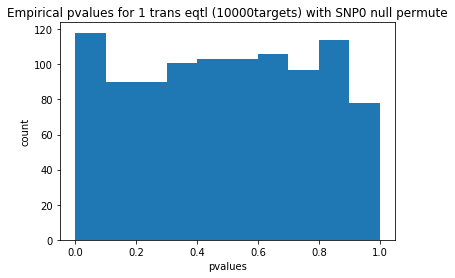

In [89]:
null_snp0 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/permute_snps/SNP0/CPMA/gene-snp-eqtl_cpma_empirical_pvals', sep='\t')
pvals = np.array(null_snp0['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for 1 trans eqtl (10000targets) with SNP0 null permute')
plt.xlabel('pvalues')
plt.ylabel('count')

In [93]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.02568923107689236, pvalue=0.5241622013089527)

In [91]:
sum(pvals_adj[0])

0

Text(0, 0.5, 'count')

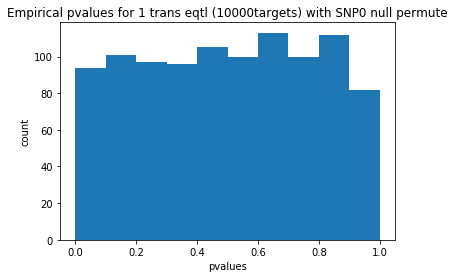

In [88]:
null_snp0 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')
pvals = np.array(null_snp0['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(pvals)
plt.title('Empirical pvalues for 1 trans eqtl (10000targets) with SNP0 null permute')
plt.xlabel('pvalues')
plt.ylabel('count')

In [94]:
genotype1 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_1/genotype.csv', sep='\t', index_col=0)
emp_pvals1 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_1/CPMA/gene-snp-eqtl_empiricalpvalues_topx_1.0_converted', sep='\t')


In [95]:
genotype1

,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,...,Sample490,Sample491,Sample492,Sample493,Sample494,Sample495,Sample496,Sample497,Sample498,Sample499
SNP0,2,1,0,1,2,1,0,0,1,1,...,1,1,1,0,0,1,1,1,1,1
SNP1,0,2,1,2,0,1,2,1,2,2,...,0,1,2,2,0,2,1,1,1,0
SNP2,1,1,2,2,2,0,0,2,1,0,...,1,2,1,1,1,0,1,0,1,0
SNP3,2,1,1,1,0,2,2,2,0,1,...,0,0,2,1,1,2,2,1,2,2
SNP4,0,1,1,0,1,2,1,1,2,1,...,0,1,0,2,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNP995,2,2,1,0,2,2,1,0,1,0,...,2,2,1,2,0,1,2,0,2,1
SNP996,2,2,0,2,2,1,1,2,2,0,...,1,2,2,2,1,1,0,2,0,2
SNP997,1,2,1,1,2,1,1,0,2,1,...,0,2,2,2,0,1,2,1,1,1
SNP998,2,0,0,1,2,0,1,1,1,1,...,1,1,1,1,1,2,0,2,1,1


In [96]:
permute_snp0_df = permute_snps('SNP0', 100000, genotype1)
permute_snp0_df.to_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/null/numTarget_10000/Beta_01/Simulation_1/permute_snps/genotype_permuteSNP0.csv', sep='\t')